### This is a turtoial of using the imebuildv2 board (RPi Controller) with python notebook

#### 1 import necessary libraries

In [1]:
import base64
import time
import paramiko

import serial
import numpy as np
from math import log
from math import sqrt
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import trange, tqdm
import scipy.io as sio
from sklearn.linear_model import LinearRegression
import csv

In [2]:
# save data to a csv file
def save_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',')
        nRep = int((data.shape[1]-1)/3)
        firstLine = ['dac_code']
        for idx in range(nRep):
            firstLine.append('iSense')
            firstLine.append('VSense')
            firstLine.append('VLoad')
        csv_writer.writerow(firstLine)
        csv_writer.writerows(data)

# load data from a csv file
def read_csv(filename):
    data = []
    with open(filename, 'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        isFirstLine = True
        # isFirstLine = False
        for row in reader:
            if not isFirstLine:
                data.append([float(i) for i in row])
            isFirstLine = False
        data = np.asarray(data)
    return data

In [9]:
# plot a saved calibration result.
def plot_cal(slot, ch, file_prefix):
    filename = file_prefix+'Slot{}_Ch{}_cal1.csv'.format(slot,ch)
    cal1 = read_csv(filename)
    filename = file_prefix+'Slot{}_Ch{}_cal2.csv'.format(slot,ch)
    cal2 = read_csv(filename)

    x1 = cal1[:,0]
    v = (x1-32768)/32768*10

    length = cal1.shape[1]
    n = len(range(2,length,2))
    iSense_avg = 0
    for idx in range(1,length,2):
        iSense_avg = iSense_avg+((cal1[:,idx])/8388608-1)*2500/49.8
    iSense_avg = iSense_avg/n
    vSense_avg = 0
    for idx in range(2,length,2):
        vSense_avg = vSense_avg+((cal1[:,idx])/8388608-1)*25
    vSense_avg = vSense_avg/n

    fig,axs = plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios': [3, 1]})
    axs[0].plot(x1,v,label = 'v')
    axs[0].plot(x1,vSense_avg,label = 'vSense')
    axs[0].plot(x1,iSense_avg,label = 'iSense*R')
    axs[0].set_xlim(0,65536)
    axs[0].set_ylabel('Voltage')
    axs[0].set_title('Calibration: Channel {}, Voltage'.format(ch))
    axs[0].legend()
    axs[1].plot(x1,vSense_avg-v,label='vSense-v')
    axs[1].set_xlim(0,65536)
    axs[1].set_xlabel('DAC Code')
    axs[1].set_ylabel('Residual')
    axs[1].legend()

    x2 = cal2[:,0]
    i = (x1-32768)/32768*20
    iSense_avg = 0
    for idx in range(1,length,2):
        iSense_avg = iSense_avg+((cal2[:,idx])/8388608-1)*2500/49.8
    iSense_avg = iSense_avg/n
    vSense_avg = 0
    for idx in range(2,length,2):
        vSense_avg = vSense_avg+((cal2[:,idx])/8388608-1)*25
    vSense_avg = vSense_avg/n

    fig,axs = plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios': [3, 1]})
    axs[0].plot(x2,i,label = 'i')
    axs[0].plot(x2,iSense_avg,label = 'iSense')
    axs[0].plot(x2,vSense_avg,label = 'vSense/R')
    axs[0].set_xlim(0,65536)
    axs[0].set_ylabel('Current')
    axs[0].set_title('Calibration: Channel {}, Current'.format(ch))
    axs[0].legend()
    axs[1].plot(x1,iSense_avg-i,label='iSense-i')
    axs[1].set_xlim(0,65536)
    axs[1].set_xlabel('DAC Code')
    axs[1].set_ylabel('Residual')
    axs[1].legend()

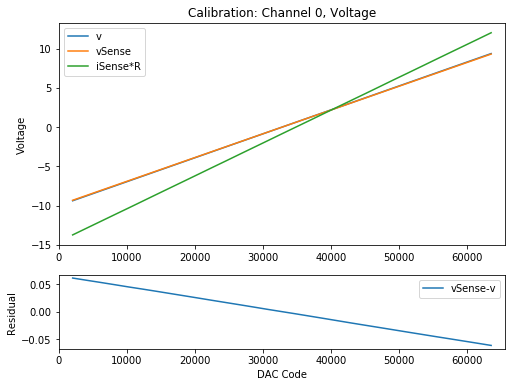

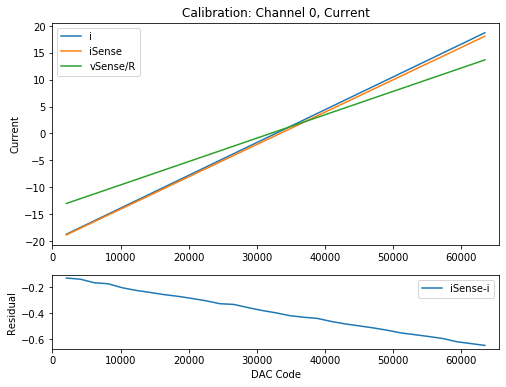

In [10]:
# have a look of the swept result
slot = 6
ch = 0
prefix = 'calibration/uncalibrated/'
plot_cal(slot, ch, prefix)